References: 
1. https://matplotlib.org/api/animation_api.html
2. https://matplotlib.org/2.1.2/gallery/animation/basic_example.html

In [6]:
import matplotlib.pyplot as plt
plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'
import numpy as np
import pandas as pd
from matplotlib import animation

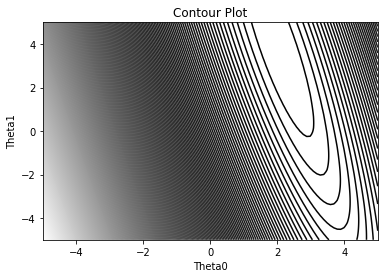

In [7]:
def loss(x,y,t0,t1):
    prediction = t0 + t1*x
    return ((y - prediction)**2).mean()

theta_1 = np.linspace(-5,5,100)
theta_0 = np.linspace(-5,5,100)

X_,Y_ = np.meshgrid(theta_0,theta_1)
### Evaluate the cost function on the grid created
def cost_on_grid(x,y,t0,t1):
    cost = np.zeros((100,100))
    for i in range(100):
        for j in range(100):
            cost[i][j] = loss(x,y,t0[i],t1[j])
    return cost
x = np.array([1,3,6])
y = np.array([6,10,16])
Z = cost_on_grid(x,y,theta_0,theta_1)
plt.title('Contour Plot')
plt.xlabel('Theta0')
plt.ylabel('Theta1')
plt.contour(X_,Y_,Z,300,cmap='gray')

Text(0.5, 1.0, 'Scatter Plot of the points')

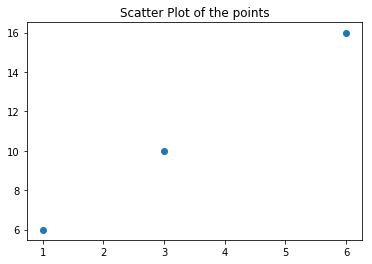

In [8]:
plt.scatter(x,y)
plt.title("Scatter Plot of the points")

Code below for the animation on the contour

In [9]:
y = y[:,np.newaxis]
x = x[:,np.newaxis]

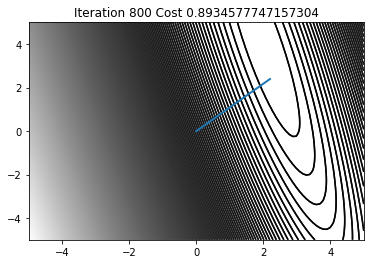

In [38]:

fig = plt.figure()
plt.contour(X_,Y_,Z ,300, cmap='gray');
ax = plt.axes(xlim=(-5, 5), ylim=(-5, 5))

line, = ax.plot([], [], lw=2)
def init():
    plt.contour(X_,Y_,Z ,300, cmap='gray');
    line.set_data([], [])
    return line,

def animation_plot(i):
    global X
    global y
    global theta
    error = y - X.dot(theta)
    old = np.copy(theta)
    for j in range(3):
        temp1 = theta[0] + 2*0.0005*(y[j] - (theta[0]+theta[1]*X[:,1][j]))
        temp2 = theta[1] + 2*0.0005*(y[j] - (theta[0]+theta[1]*X[:,1][j]))*X[:,1][j]
        theta[0] = temp1
        theta[1] = temp2
    new = theta
    #print(old,new)
#     theta= theta + 2/len(X)*alpha*X.T.dot(error)
    val = (loss(x,y,theta[0],theta[1]))
    #print(theta)
    plt.title("Iteration "+str(i+1)+ " Cost "+ str(val))
    line.set_data(x_to_plot,y_to_plot)
    x_to_plot.append(theta[0])
    y_to_plot.append(theta[1])
    return line,
X = np.c_[np.ones(len(x)),x]
theta = np.zeros((len(X[0]),1))
x_to_plot = list(theta[0])
y_to_plot = list(theta[1])
line.set_data(x_to_plot,y_to_plot)
anim = animation.FuncAnimation(fig, animation_plot, init_func=init, frames=800, interval=20, blit=True)
anim.save('16110142_Animation_Contour_te.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
plt.show()

In [31]:
X[:,1]

array([1., 3., 6.])

The link for the Contour Animation is [here](https://drive.google.com/file/d/1hfv2Bfckdz4db_-OnWau0GQWw4zImxJb/view?usp=sharing).

Code below for the animation on the line

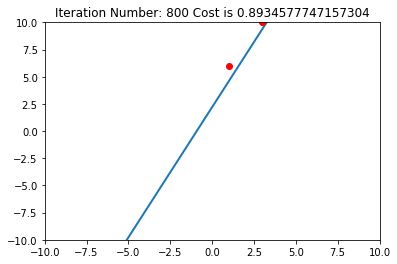

In [43]:
fig = plt.figure()
ax = plt.axes(xlim=(-10, 10), ylim=(-10, 10))
line, = ax.plot([], [], lw=2)
line2, = ax.plot(x,y,'ro')

def init():
    line.set_data([], [])
    return line,

def animation_plot(i):
    
    global X
    global y
    global theta
    alpha = 0.01
    error = y - X.dot(theta)
    old = np.copy(theta)
    for j in range(3):
        temp1 = theta[0] + 2*0.0005*(y[j] - (theta[0]+theta[1]*X[:,1][j]))
        temp2 = theta[1] + 2*0.0005*(y[j] - (theta[0]+theta[1]*X[:,1][j]))*X[:,1][j]
        theta[0] = temp1
        theta[1] = temp2
    new = theta
    #print(old,new)
#     theta= theta + 2/len(X)*alpha*X.T.dot(error)
    #val = (loss(x,y,theta[0],theta[1]))
    #print(theta)
   # plt.title("Iteration "+str(i+1)+ " Cost "+ str(val))
#     error = y - X.dot(theta)
#     theta= theta + 2/len(X)*alpha*X.T.dot(error)
    curr_x = np.linspace(-20, 20, 1000)
    curr_y = theta[0]+ curr_x * theta[1]
    val = (loss(x,y,theta[0],theta[1]))
    plt.title("Iteration Number: "+str(i+1)+ " Cost is "+str(val))
    line2.set_data(x,y)
    line.set_data(curr_x,curr_y)
    return line,
X = np.c_[np.ones(len(x)),x]
theta = np.zeros((len(X[0]),1))
anim = animation.FuncAnimation(fig, animation_plot, init_func=init,
                               frames=800, interval=20, blit=True)
anim.save('animation_line.mp4', fps=5, extra_args=['-vcodec', 'libx264'])
plt.show()


The link for the animation of line is [here](https://drive.google.com/file/d/15hbv0apc8mBf-slqU6bODsr-X6fHoXrH/view?usp=sharing).